In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(12)
num_observations = 5000

In [20]:
x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

In [25]:
X = np.vstack((x1, x2)).astype(np.float32)
Y = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))



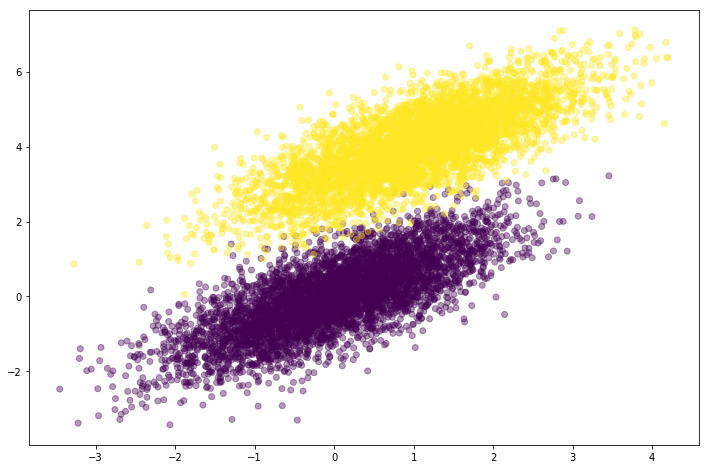

In [26]:
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1],
            c = Y, alpha = .4)

In [30]:
# reshape the feature and labels to the format [number_of_features, training_examples]
X = X.T
Y = Y.reshape(1, Y.shape[0])
X.shape

(2, 10000)

In [31]:
#implement the sigmoid function
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

In [39]:
def logistic_regression(X, Y, w, b, learning_rate = 0.001, epochs = 1000):
    cost_history = {}
    m = X.shape[1]
    for i in range(epochs):
        Z = np.dot(w.T, X) + b
        A = sigmoid(Z)
        
        # Calculate the cost
        cost = (-1/m) * np.sum((Y * np.log(A)) + ((1-Y) * np.log(1-A)))
        cost_history[i] = cost
        dZ = A - Y
        dW = (1/m) * np.dot(X, dZ.T)
        db = (1/m) * np.sum(dZ)
        
        w = w - learning_rate * dW
        b = b - learning_rate * db
    return w, b, cost_history    


In [46]:
w = np.zeros((2,1))
b = 0
w, b , cost = logistic_regression(X, Y, w, b, learning_rate=0.01, epochs=2000)


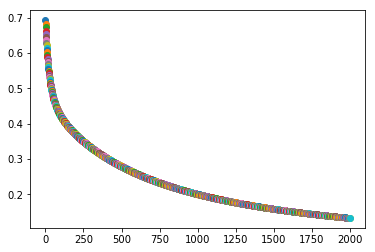

In [47]:
for i in cost:
    plt.plot(i, cost[i],'o')
plt.show()    
    